<a href="https://colab.research.google.com/github/awalinrizky/mandiri10/blob/main/mandiri10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Latihan 1 Klasifikasi Suhu Udara (KNN)**

--- Data Loading dan Pre-processing ---
Data Test: [[16  3]]

--- Hasil Klasifikasi Data Uji (K=3) ---
Persepsi Marry (K=3) untuk (16, 3) adalah: Dingin

--- Mencari Nilai K Terbaik Menggunakan Cross-Validation ---
Akurasi untuk K=1: 1.00
Akurasi untuk K=2: 0.88
Akurasi untuk K=3: 0.75
Akurasi untuk K=4: 0.62
Akurasi untuk K=5: 0.75
Akurasi untuk K=6: 0.25
Akurasi untuk K=7: 0.00

Nilai K yang memberikan akurasi tertinggi adalah: 1
Akurasi tertinggi yang dicapai: 1.00


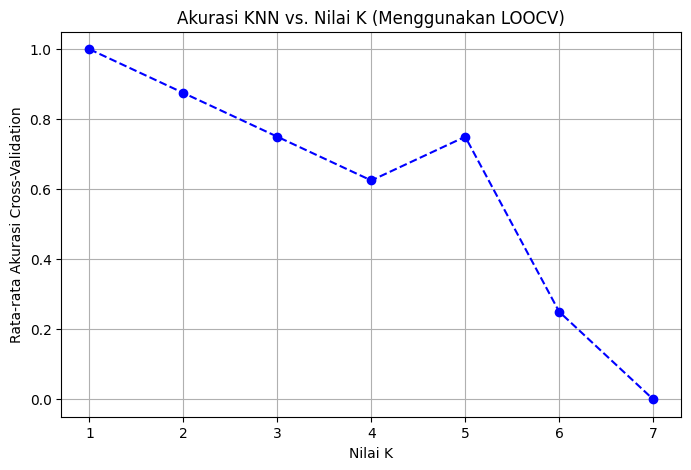

In [4]:

# Import library yang diperlukan
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, LeaveOneOut # Untuk mencari K terbaik
import matplotlib.pyplot as plt

print("--- Data Loading dan Pre-processing ---")
# Data Latih dari slide (Tabel 285)
data = {
    'Temperatur': [10, 25, 15, 20, 18, 20, 22, 24],
    'Angin': [0, 0, 5, 3, 7, 10, 5, 6],
    'Klasifikasi': ['Dingin', 'Panas', 'Dingin', 'Panas', 'Dingin', 'Dingin', 'Panas', 'Panas']
}
df = pd.DataFrame(data)

# Pisahkan fitur (X) dan label (y)
X = df[['Temperatur', 'Angin']]
y = df['Klasifikasi']

# Data Uji (yang ditanyakan di soal)
X_test = pd.DataFrame({'Temperatur': [16], 'Angin': [3]})
print(f"Data Test: {X_test.values}")

# --- Bagian A: Klasifikasi Data Uji dengan K=3 ---
knn_k3 = KNeighborsClassifier(n_neighbors=3)
knn_k3.fit(X, y)
prediksi_k3 = knn_k3.predict(X_test)
print(f"\n--- Hasil Klasifikasi Data Uji (K=3) ---")
print(f"Persepsi Marry (K=3) untuk (16, 3) adalah: {prediksi_k3[0]}")

# --- Bagian B: Mencari Nilai K Terbaik (1 sampai 7) ---
print("\n--- Mencari Nilai K Terbaik Menggunakan Cross-Validation ---")
k_range = range(1, 8) # Mencoba K dari 1 hingga 7
scores = []

# Initialize LeaveOneOut cross-validator for LOOCV
loo = LeaveOneOut()

for k in k_range:
    # Menggunakan cross_val_score dengan LeaveOneOut (LOOCV)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Rata-rata akurasi dari semua lipatan cross-validation
    score = cross_val_score(knn, X, y, cv=loo, scoring='accuracy').mean()
    scores.append(score)
    print(f"Akurasi untuk K={k}: {score:.2f}")

# Menemukan K dengan akurasi tertinggi
best_k_index = np.argmax(scores)
best_k = k_range[best_k_index]
max_accuracy = max(scores)

print(f"\nNilai K yang memberikan akurasi tertinggi adalah: {best_k}")
print(f"Akurasi tertinggi yang dicapai: {max_accuracy:.2f}")

# Visualisasi
plt.figure(figsize=(8, 5))
plt.plot(k_range, scores, marker='o', linestyle='--', color='blue')
plt.title('Akurasi KNN vs. Nilai K (Menggunakan LOOCV)')
plt.xlabel('Nilai K')
plt.ylabel('Rata-rata Akurasi Cross-Validation')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# **Bagian 2 Studi Kasus Prediksi Kelulusan AI**

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import pandas as pd

print("--- Data Input ---")
# Data Hasil Sebenarnya (Actual) dan Prediksi (Predicted)
actual = ['Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus']
predicted = ['Lulus', 'Lulus', 'Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus']

# Definisikan label: Positive='Lulus', Negative='Tidak Lulus'
labels = ['Lulus', 'Tidak Lulus']

# --- Step 1: Buat Confusion Matrix ---
cm = confusion_matrix(actual, predicted, labels=labels)
# Tampilkan dalam bentuk DataFrame agar mudah dibaca
df_cm = pd.DataFrame(cm, index=[f'Actual {l}' for l in labels], columns=[f'Predicted {l}' for l in labels])
print("\n1. Confusion Matrix:")
print(df_cm)

# Ambil nilai TP, FN, FP, TN
# cm.ravel() akan menghasilkan [TP, FN, FP, TN] berdasarkan urutan labels
TP, FN, FP, TN = cm.ravel()
print(f"\nTP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}")

# --- Step 2: Hitung Accuracy, Precision, dan Recall ---
accuracy = accuracy_score(actual, predicted)
# pos_label='Lulus' menentukan 'Lulus' sebagai kelas positif untuk Precision dan Recall
precision = precision_score(actual, predicted, pos_label='Lulus')
recall = recall_score(actual, predicted, pos_label='Lulus')

print("\n2. Hasil Perhitungan Metrik:")
print(f"Accuracy: {accuracy:.2f} ({accuracy*100:.0f}%)")
print(f"Precision: {precision:.2f} ({precision*100:.0f}%)")
print(f"Recall: {recall:.2f} ({recall*100:.0f}%)")

--- Data Input ---

1. Confusion Matrix:
                    Predicted Lulus  Predicted Tidak Lulus
Actual Lulus                      3                      2
Actual Tidak Lulus                1                      4

TP: 3, FN: 2, FP: 1, TN: 4

2. Hasil Perhitungan Metrik:
Accuracy: 0.70 (70%)
Precision: 0.75 (75%)
Recall: 0.60 (60%)


# **Latihan 3: Studi Kasus Prediksi Cuaca Menggunakan KNN**

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Data loading
data = {
    'Temperature': [14.0, 39.0, 30.0, 38.0, 27.0, 32.0, -2.0, 3.0, 3.0, 28.0],
    'Humidity': [73, 96, 64, 83, 74, 55, 97, 85, 83, 74],
    'Wind Speed': [9.5, 8.5, 7.0, 1.5, 17.0, 3.5, 8.0, 6.0, 6.0, 8.5],
    'Precipitation': [82.0, 71.0, 16.0, 82.0, 66.0, 26.0, 86.0, 96.0, 66.0, 107.0],
    'Cloud Cover': ['partly cloudy', 'partly cloudy', 'clear', 'clear', 'overcast', 'overcast', 'overcast', 'partly cloudy', 'overcast', 'clear'],
    'Atmospheric Pressure': [1010.82, 1011.43, 1018.72, 1026.25, 990.67, 1010.03, 990.87, 984.46, 999.44, 1012.13],
    'UV Index': [2, 7, 5, 7, 1, 2, 1, 1, 0, 8],
    'Season': ['Winter', 'Spring', 'Spring', 'Spring', 'Winter', 'Summer', 'Winter', 'Winter', 'Winter', 'Winter'],
    'Visibility': [3.5, 10.0, 5.5, 1.0, 2.5, 5.0, 4.0, 3.5, 1.0, 7.5],
    'Location': ['inland', 'inland', 'mountain', 'coastal', 'mountain', 'inland', 'inland', 'inland', 'mountain', 'coastal'],
    'Weather Type': ['Rainy', 'Cloudy', 'Sunny', 'Sunny', 'Rainy', 'Cloudy', 'Snowy', 'Snowy', 'Snowy', 'Sunny']
}
df = pd.DataFrame(data)

# Pisahkan fitur (X) dan label (y)
X = df.drop('Weather Type', axis=1)
y = df['Weather Type']

# One-Hot Encoding untuk Fitur Kategorikal
X_encoded = pd.get_dummies(X, columns=['Cloud Cover', 'Season', 'Location'], drop_first=True)
# Drop kolom UV Index dan Precipitation karena bersifat ordinal/tidak lazim diskalakan
X_encoded = X_encoded.drop(['UV Index', 'Precipitation'], axis=1)

# Standard Scaling sangat penting untuk KNN pada data cuaca
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Convert scaled array back to DataFrame to preserve column names for train_test_split
numerical_features = X_encoded.columns.tolist() # All columns are now numeric
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features)

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42
)

# Pelatihan Model dengan K terbaik
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Evaluasi
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

      Cloudy       0.00      0.00      0.00       1.0
       Rainy       0.00      0.00      0.00       0.0
       Snowy       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

